In [89]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [90]:
client_id = 'xxxxxxxxxx'
client_secret = 'xxxxxxxxxx'

client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Get TrySail information

In [100]:
# search artist and song id
search = spotify.search("TrySail", limit=50, offset=0, type='track', market=None)
trysail = pd.DataFrame.from_dict(search["tracks"]["items"])
trysail_name = pd.DataFrame(trysail["name"])
trysail = pd.DataFrame(trysail["id"])

# get song information
trysail_info = pd.DataFrame()
for url in song_trysail["id"]:
    df = pd.DataFrame.from_dict(spotify.audio_features(url))
    trysail_info = trysail_info.append(df)

# drop unnecessary information 
trysail_info = trysail_info.reset_index(drop=True)
trysail_info = trysail_info.drop(columns=["analysis_url","id","track_href","type","uri"])

# name concat
trysail_info_all = pd.concat([trysail_name, trysail_info], axis=1)
trysail_info_all.head(30)

,name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Adrenaline!!!,0.12500,0.603,274147,0.959,0.000016,7,0.3010,-2.003,1,0.0567,133.932,4,0.885
1,High Free Spirits,0.04570,0.605,284200,0.936,0.000000,8,0.2840,-2.112,1,0.0657,93.070,4,0.666
2,Azure,0.15800,0.605,266107,0.927,0.000000,4,0.3280,-3.691,1,0.0311,140.005,4,0.783
3,Senpai,0.24900,0.526,312733,0.906,0.000000,0,0.0339,-3.843,1,0.0574,161.969,4,0.364
4,Original,0.00685,0.499,298533,0.894,0.000196,8,0.1380,-4.294,1,0.1040,164.098,3,0.566
5,Kakawari,0.01910,0.639,265387,0.908,0.000000,7,0.1100,-2.957,1,0.0286,96.484,4,0.877
6,Truth.,0.01450,0.511,253227,0.905,0.000000,5,0.8000,-3.945,1,0.0643,174.040,4,0.349
7,BraveSail,0.22100,0.639,306267,0.807,0.000010,9,0.2670,-4.433,1,0.0263,109.976,4,0.921
8,Tail Wind,0.06660,0.572,241627,0.973,0.000002,7,0.1430,-2.348,1,0.0639,165.005,4,0.698
9,Coding,0.02520,0.544,233213,0.953,0.000023,2,0.3380,-2.992,0,0.0630,159.971,4,0.760


In [101]:
trysail_info.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.12500,0.603,274147,0.959,0.000016,7,0.3010,-2.003,1,0.0567,133.932,4,0.885
1,0.04570,0.605,284200,0.936,0.000000,8,0.2840,-2.112,1,0.0657,93.070,4,0.666
2,0.15800,0.605,266107,0.927,0.000000,4,0.3280,-3.691,1,0.0311,140.005,4,0.783
3,0.24900,0.526,312733,0.906,0.000000,0,0.0339,-3.843,1,0.0574,161.969,4,0.364
4,0.00685,0.499,298533,0.894,0.000196,8,0.1380,-4.294,1,0.1040,164.098,3,0.566


# Analysis

In [102]:
trysail_info.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,0.137453,0.575120,263922.360000,0.882960,0.036809,4.520000,0.260444,-3.483880,0.840000,0.056076,138.197000,3.920000,0.67232
std,0.206337,0.076464,28703.794373,0.145753,0.183582,3.097311,0.164229,2.116822,0.374166,0.024990,32.630607,0.276887,0.17320
min,0.006850,0.413000,205053.000000,0.303000,0.000000,0.000000,0.033900,-12.711000,0.000000,0.026300,77.529000,3.000000,0.34900
25%,0.025200,0.511000,241627.000000,0.894000,0.000000,2.000000,0.137000,-3.843000,1.000000,0.033300,114.978000,4.000000,0.56600
50%,0.066600,0.571000,266107.000000,0.928000,0.000002,4.000000,0.269000,-2.992000,1.000000,0.057400,140.005000,4.000000,0.69800
75%,0.166000,0.639000,285160.000000,0.947000,0.000027,7.000000,0.338000,-2.289000,1.000000,0.064300,162.941000,4.000000,0.79000
max,0.962000,0.697000,312733.000000,0.978000,0.918000,9.000000,0.800000,-1.739000,1.000000,0.117000,202.930000,4.000000,0.92100


- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
- danceability: Degree of fitness for dance (0.0 to 1.0)
- duration_ms: Song length.
- energy: Energetic tracks feel fast, loud, and noisy (0.0 to 1.0)
- instrumentalness: The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- loudness: The overall loudness of a track in decibels (dB). Values typical range between -60 and 0 db.
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness: data > 0.66, made of spoken. 0.33 < data < 0.66, both talk and music including rap music. data < 0.33, music.
- tempo: BPM
- time_signature: An estimated overall time signature of a track. 
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Scatter plot

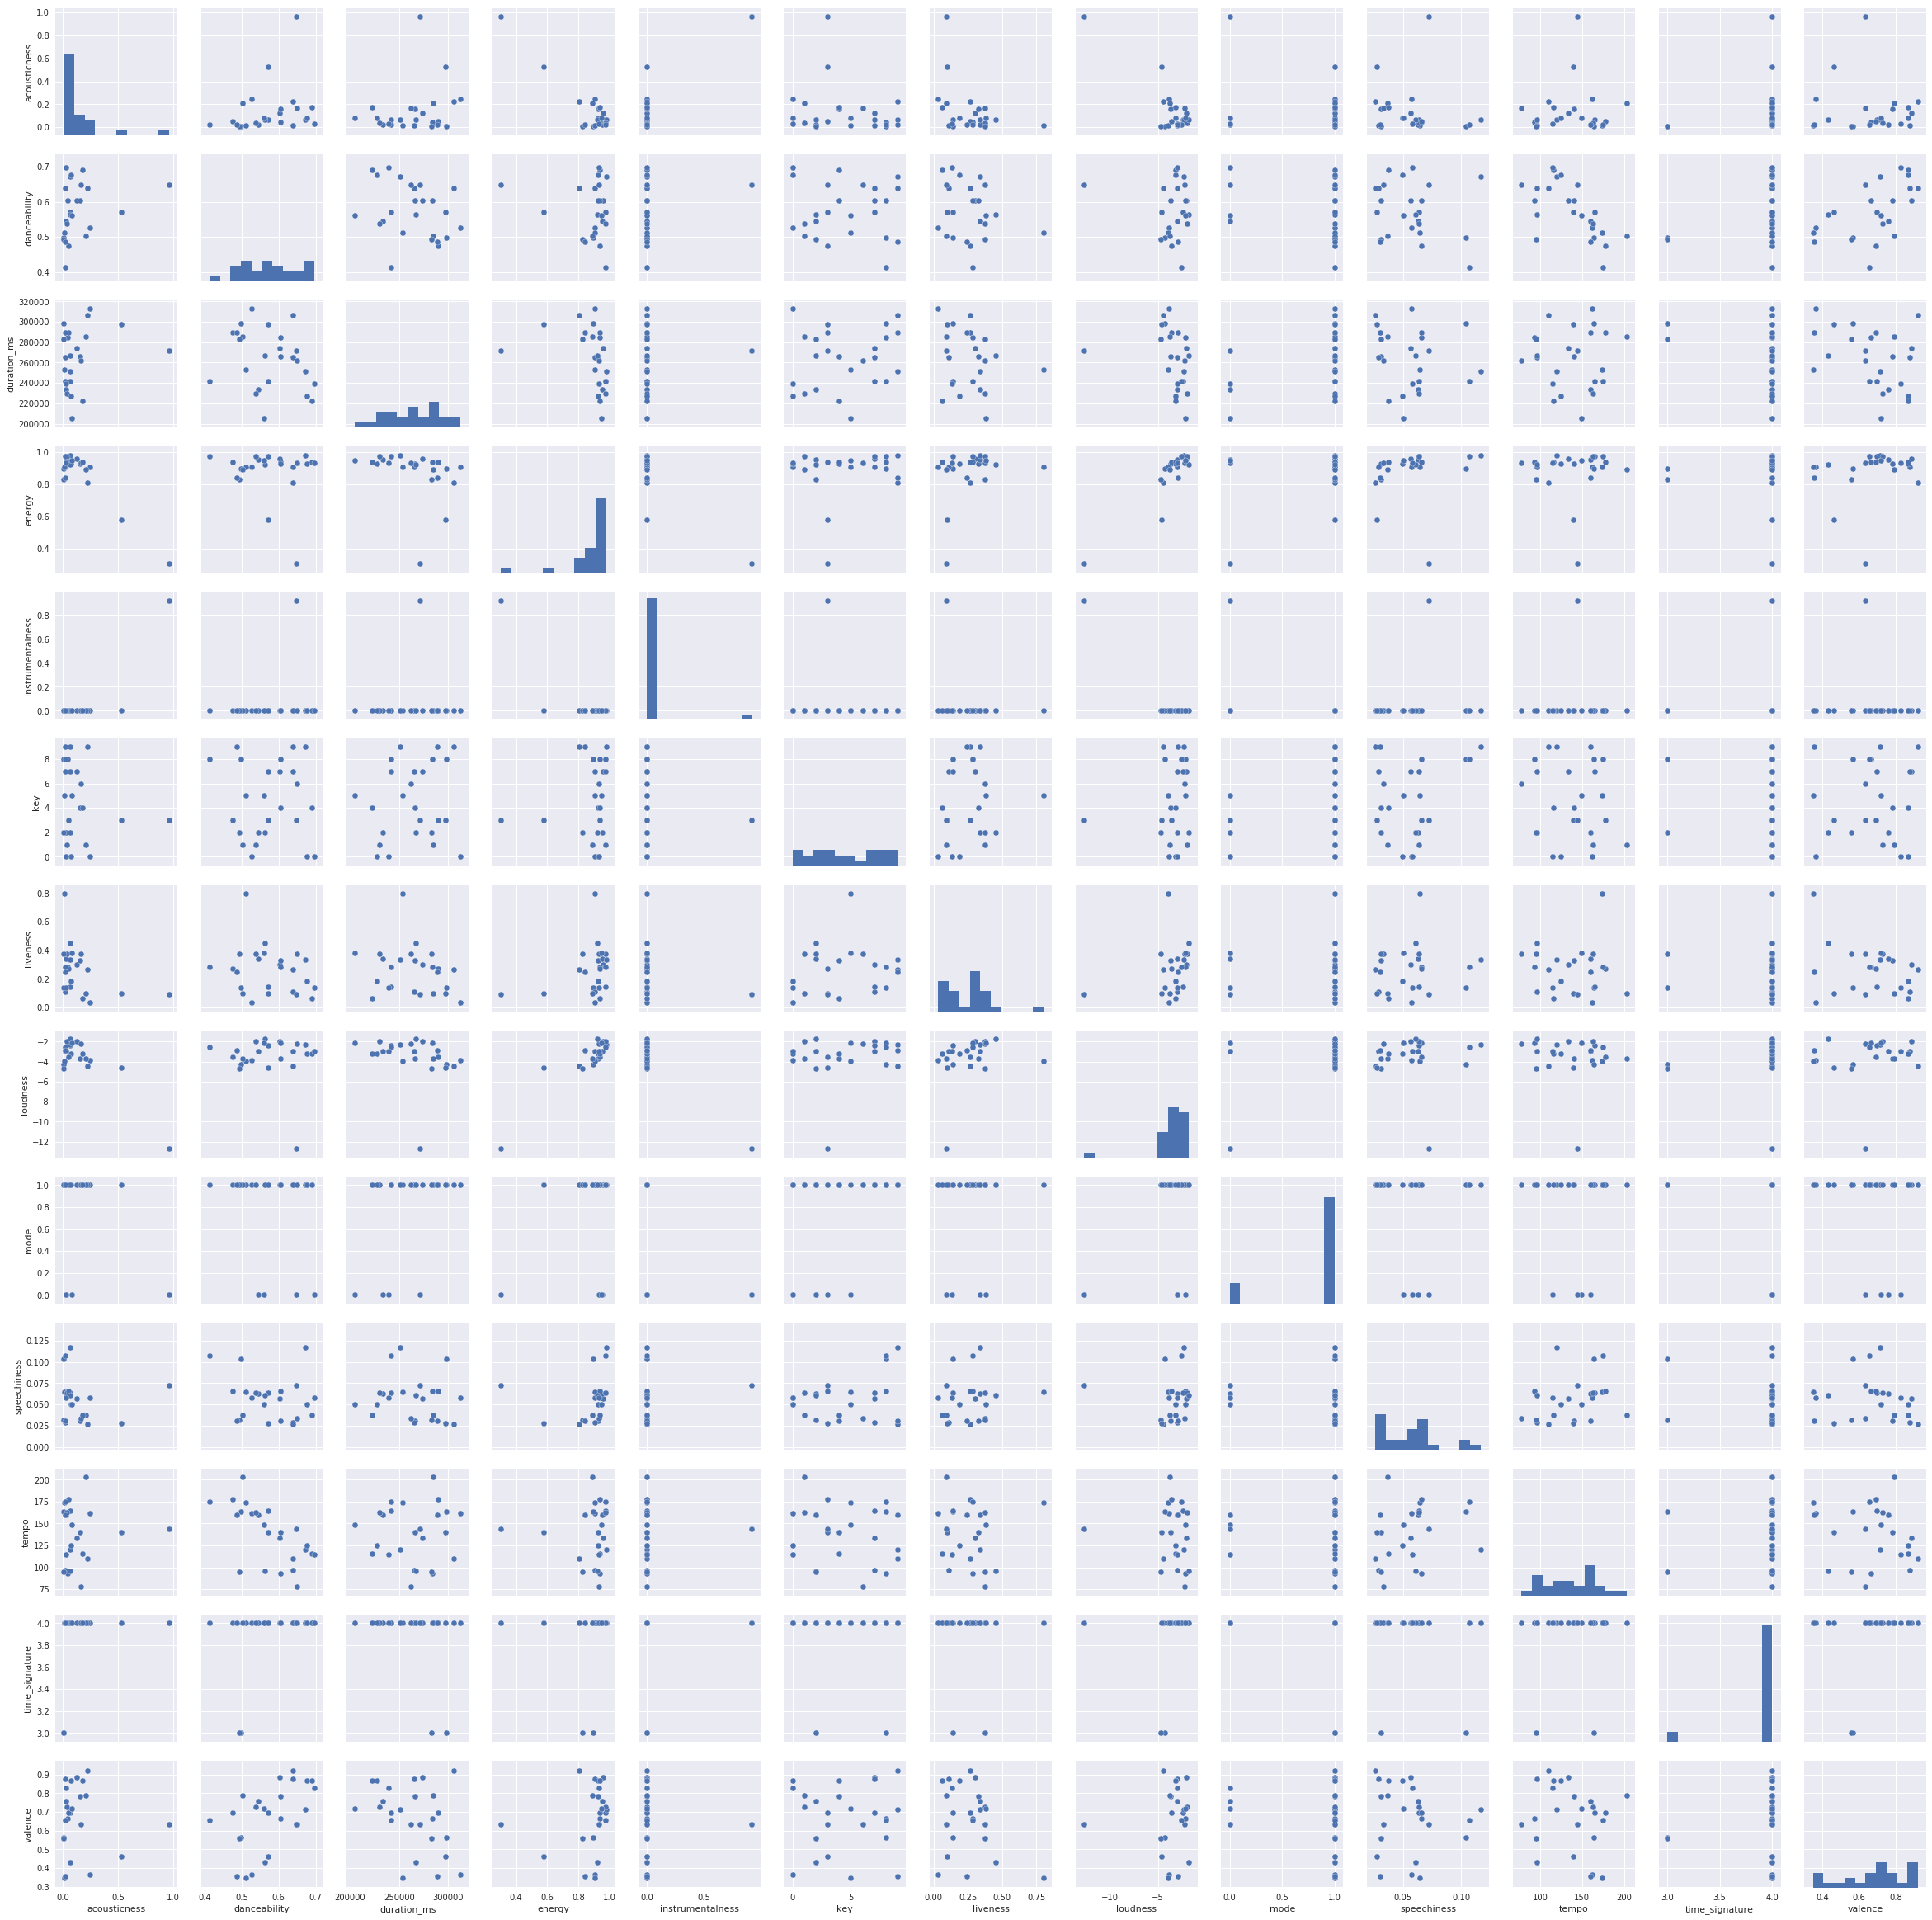

In [103]:
sns.pairplot(trysail_info)

## Correlation

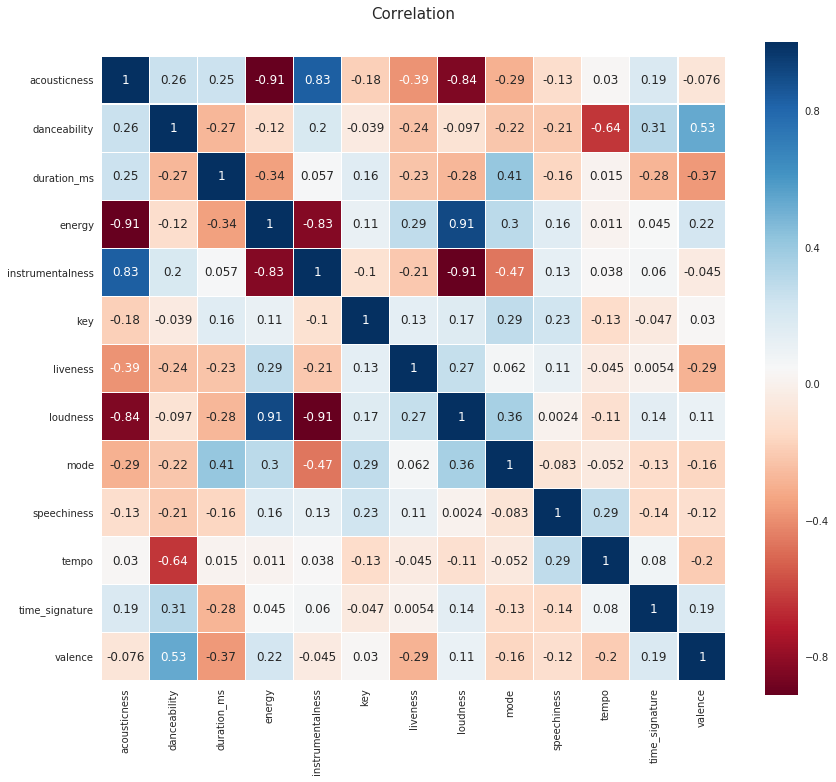

In [104]:
corr_mat = trysail_info.corr(method='pearson')
plt.figure(figsize=(14,12))
plt.title('Correlation', y=1.05, size=15)
colormap = plt.cm.RdBu
sns.heatmap(corr_mat,
            linewidths=0.1,
            cmap=colormap,
            vmax=1.0, 
            square=True, 
            annot=True)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd682805c0>,
      dtype=object)

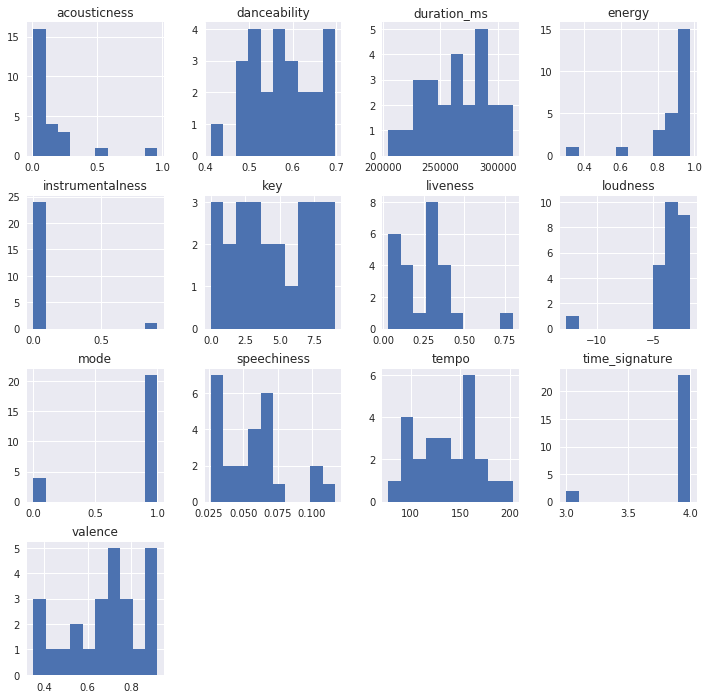

In [105]:
trysail_info.hist(figsize=(12, 12), bins=10)

In [119]:
valence = pd.DataFrame(trysail_info_all["name"])
valence["valence"] = trysail_info_all["valence"]
valence.head(30)

,name,valence
0,Adrenaline!!!,0.885
1,High Free Spirits,0.666
2,Azure,0.783
3,Senpai,0.364
4,Original,0.566


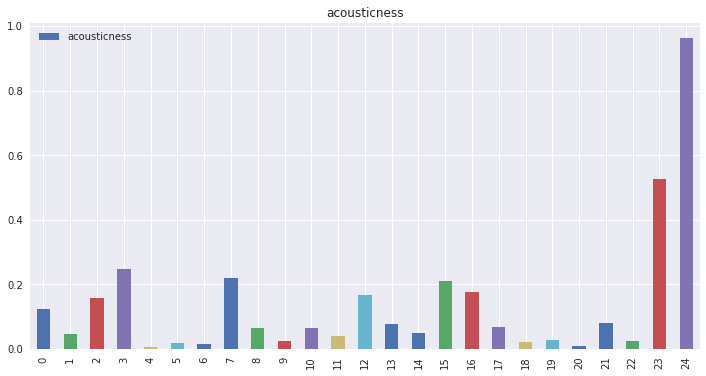

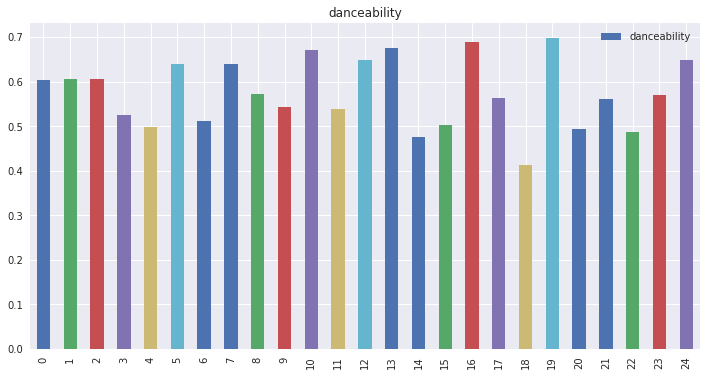

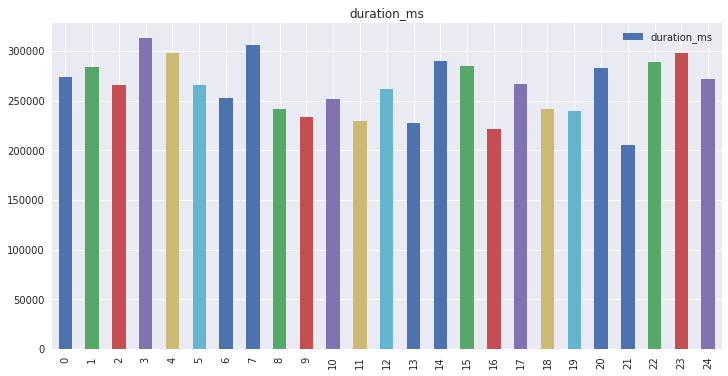

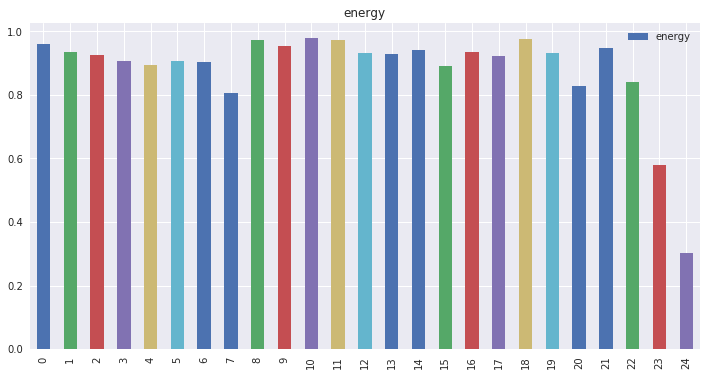

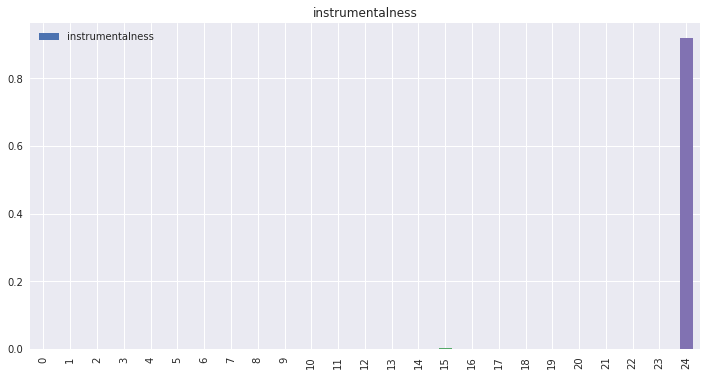

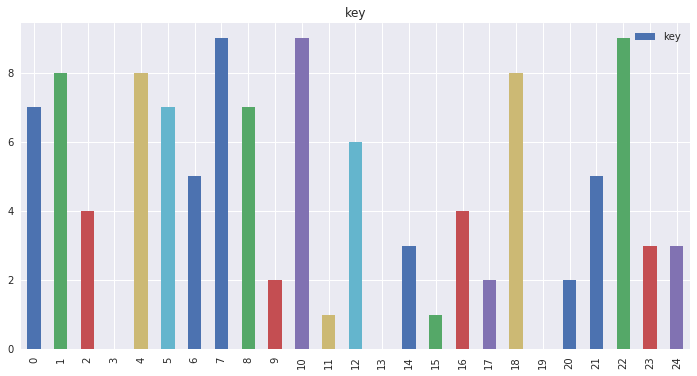

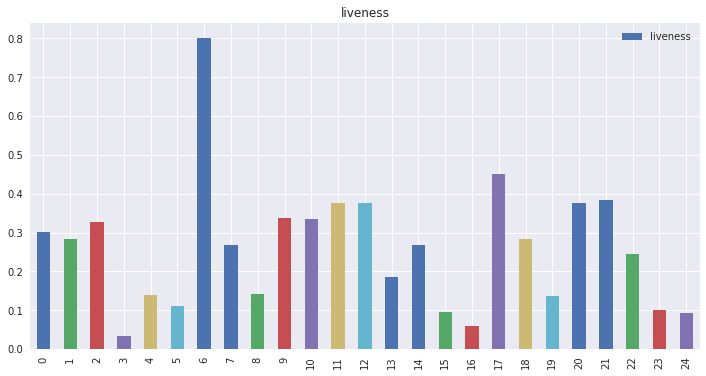

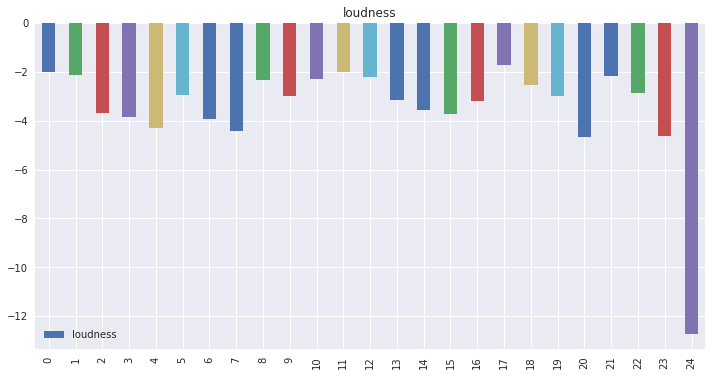

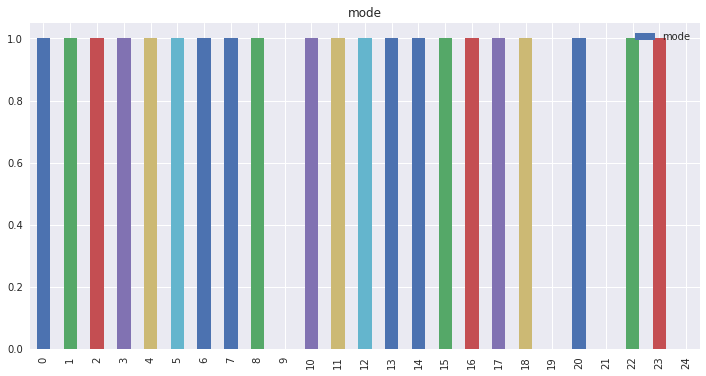

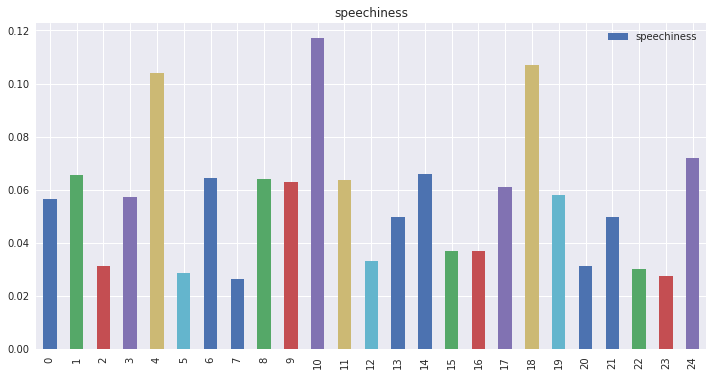

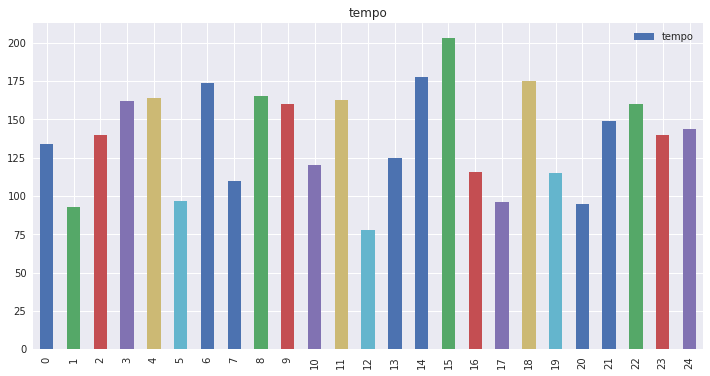

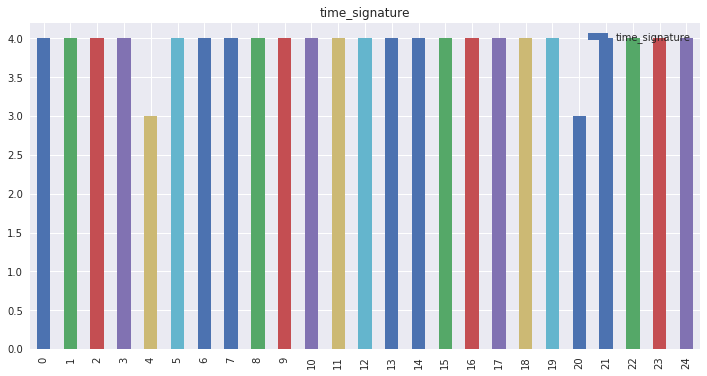

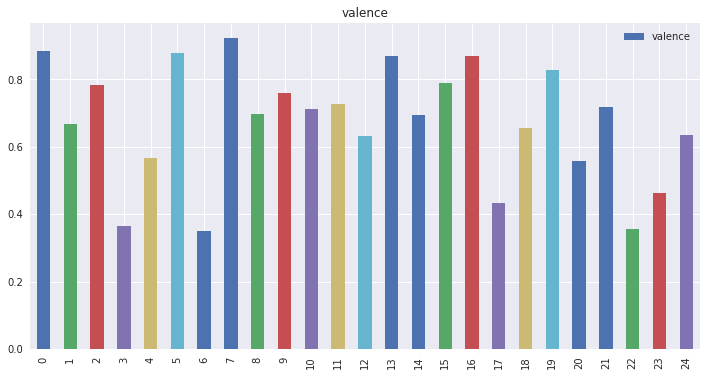

In [136]:
colum_name = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "loudness", "mode", "speechiness", "tempo", "time_signature", "valence"]

for name in colum_name:
    trysail_info.plot.bar(y=name, figsize=(12,6))
    plt.title(name)

# Reference

- https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/
- https://qiita.com/kazuya-n/items/fbee07ef778e166cb6dd
- https://note.mu/hkrrr_jp/n/n9f33734d2cd6